In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from importlib import reload

In [2]:
from Kmedoids import kMedoids
from helper_functions import pairwise_distance, nLCS
from score_distance import distance_k_neighbor, distance_clusters

import matplotlib.pyplot as plt

# Importing the data

We creat two data sets: one with dog genes from family 0, the other from family 1. We will train on family 0 and test on a mix of family 0 and 1 (the goal will be to find the outliers from family 1).

In [8]:
df_dog = pd.read_csv('data\dog_data.txt', delimiter= '\t')

In [9]:
df_dog

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


In [34]:
dog_0= df_dog[df_dog["class"]== 0]
dog_0

,sequence,class
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
6,ATGACGTCCACCTGCCCCAATAACACCAGGGAGAGCAACAGCAGCC...,0
7,ATGGCCAACTCCACAGGGCTGACCACCTCGGAAGTCGTGGGCTCGG...,0
8,ATGGCGAACTATAGCCATGCAGCTGACAACATTTTACAAAATCTTT...,0
9,ATGACCACTCCTCACAATCAAGCTCAACCTGGCCCTTCCAACAATT...,0
...,...,...
785,ATTCTGAGTAACAACAAAATATCCGAGCTGAAGAATGGCTCATTTT...,0
786,ATGGAGAGTAACCTGTCTGGCCTGGTGCCTGCTGCTGGGCTGGTGC...,0
787,CTCAGAGTGCGGGGCCCAGGGCCCAGGCAGGCTGCCTGTGCCTCTC...,0
798,ATGTTTCAATATGAAGAAAGCAATGTTACTCAGAATCAAAATATGG...,0


In [13]:
dog_1= df_dog[df_dog["class"]== 1]
dog_1

,sequence,class
85,ATGGGCTGTGTGTTCTGCAAGAAGTCGGAGCCGGGGCTCAAGGACG...,1
115,ATGGGCTGCATTAAAAGTAAAGAAAACAAAAGTCCAACCATTAAAT...,1
119,GCTGTCAAAAGCATGCCTCTGTGCCATTCGGGTGCCACCACCAGGG...,1
150,ATGTTGGAGATCTGCTTGAAGTTGGTGGGCTGCAAATCCAAGAAGG...,1
151,ATGGGGCAGCAGCCTGGCAAAGTTCTTGGGGACCAAAGAAGGCCAA...,1
...,...,...
745,ATGGGCTGTGTGCAATGTAAGGATAAAGAAGCAACAAAACTGACAG...,1
746,CTCCTTGTTCTCTGCAGGGAAGGAGATTGGTGGGAAGCCCGCTCCT...,1
796,ATGATAGTGCTGGCGCCAGCCTGGAGCCCAACTGCCTCCCTGTTGC...,1
797,ATGATAGTGCTGGCGCCAGCCTGGAGCCCAACTGCCTCCCTGTTGC...,1


In [29]:
dog_0_np = dog_0["sequence"].to_numpy()
dog_1_np = dog_1["sequence"].to_numpy()

In [40]:
np.unique(dog_0_np).shape, dog_0_np.shape

((131,), (131,))

In [41]:
np.unique(dog_1_np).shape, dog_1_np.shape

((75,), (75,))

Generating a train and test dataset from the 0 class. Also we select 20 abnormal elements from class 1.

In [45]:
train, test_normal = train_test_split(dog_0_np, test_size = 0.2, shuffle = True, random_state = 0)

In [50]:
test_normal.shape, train.shape

((27,), (104,))

In [65]:
np.random.seed(0)
np.random.shuffle(dog_1_np)
test_abnormal = dog_1_np[:20]

# Applying point based methods

# K memoids

In [49]:
from Kmedoids import kMedoids
from helper_functions import pairwise_distance, nLCS
from score_distance import distance_k_neighbor, distance_clusters
import helper_functions

## Computing the distance function for the training set

In [51]:
# The distance matrix is 1-similarity
D  = pairwise_distance(train, nLCS)

D = 1-D
D

array([[0.        , 0.3736637 , 0.33036217, ..., 0.37633441, 0.34797018,
        0.40462094],
       [0.3736637 , 0.        , 0.35902737, ..., 0.02294492, 0.37492103,
        0.42971683],
       [0.33036217, 0.35902737, 0.        , ..., 0.35983049, 0.35849793,
        0.4321864 ],
       ...,
       [0.37633441, 0.02294492, 0.35983049, ..., 0.        , 0.37730759,
        0.42357338],
       [0.34797018, 0.37492103, 0.35849793, ..., 0.37730759, 0.        ,
        0.38062219],
       [0.40462094, 0.42971683, 0.4321864 , ..., 0.42357338, 0.38062219,
        0.        ]])

In [52]:
D.shape

(104, 104)

In [53]:
for i in range(D.shape[0]):
    print(len(np.where(D[:, i] == 0)[0]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [54]:
from importlib import reload
import Kmedoids
Kmedoids = reload(Kmedoids)
from Kmedoids import kMedoids

In [ ]:
len(np.unique(human_train)) != len(human_train)

In [ ]:
np.unique(human_train).shape, human_train.shape

## Computing the distance between the test and train data

Note that this is not strictly necessary for the K-medoids method, but is required for the k-NN so we do it once for both.

In [61]:
D_normal = pairwise_distance(test_normal, nLCS, Y = train)

D_normal = 1-D_normal

In [64]:
D_normal.shape

(27, 104)

In [66]:
D_abnormal = pairwise_distance(test_abnormal, nLCS, Y = train)

D_abnormal = 1-D_abnormal

In [67]:
D_normal.shape, D_abnormal.shape

((27, 104), (20, 104))

## Fitting the k-medoids

In [146]:
# Computing the medoids

n_clusters = 3
M, C = kMedoids(D, n_clusters, init = "heuristic")

M, C

Terminated in 3 iterations


(array([ 59, 101,  14], dtype=int64),
 {0: array([  4,   8,  10,  11,  12,  16,  17,  18,  19,  20,  21,  23,  28,
          30,  31,  32,  33,  34,  38,  44,  45,  50,  51,  55,  56,  57,
          58,  59,  61,  63,  66,  67,  71,  73,  75,  76,  77,  80,  82,
          84,  85,  86,  89,  90,  91,  92,  94,  96,  98, 102, 103],
        dtype=int64),
  1: array([  1,   5,   7,  13,  24,  26,  27,  29,  40,  41,  42,  43,  47,
          48,  49,  52,  68,  72,  74,  78,  83,  93,  97, 101], dtype=int64),
  2: array([  0,   2,   3,   6,   9,  14,  15,  22,  25,  35,  36,  37,  39,
          46,  53,  54,  60,  62,  64,  65,  69,  70,  79,  81,  87,  88,
          95,  99, 100], dtype=int64)})

In [147]:
import helper_functions

helper_functions = reload(helper_functions)

from helper_functions import pairwise_distance

# Evaluation

In [148]:
# Assigning the clusters
clusters_normal = np.argmin(D_normal[:, M], axis = 1)
clusters_abnormal = np.argmin(D_abnormal[:, M], axis = 1)

In [149]:
# Computing the scores (the smallest distance)
score_normal = np.min(D_normal[:, M], axis = 1)
score_abnormal = np.min(D_abnormal[:, M], axis = 1)

In [150]:
D_normal[0, M], score_normal[0]

(array([0.40942765, 0.34993924, 0.35027758]), 0.3499392362277357)

In [151]:
D_abnormal[0, M], score_abnormal[0]

(array([0.34842963, 0.45024051, 0.42054903]), 0.3484296300997055)

In [152]:
score_normal.shape, score_abnormal.shape

((27,), (20,))

In [153]:
# Computing all the scores:
labels = np.zeros(score_normal.shape[0]+ score_abnormal.shape[0])
labels[score_normal.shape[0]: ] = 1
scores = np.hstack((score_normal, score_abnormal))
scores = np.vstack((scores, labels)).T

In [154]:
scores

array([[0.34993924, 0.        ],
       [0.4760614 , 0.        ],
       [0.34462292, 0.        ],
       [0.33938723, 0.        ],
       [0.36666763, 0.        ],
       [0.35870578, 0.        ],
       [0.02842942, 0.        ],
       [0.33498993, 0.        ],
       [0.3522578 , 0.        ],
       [0.31775381, 0.        ],
       [0.3679271 , 0.        ],
       [0.34798879, 0.        ],
       [0.35178156, 0.        ],
       [0.3374695 , 0.        ],
       [0.35273522, 0.        ],
       [0.35893565, 0.        ],
       [0.34950956, 0.        ],
       [0.34079779, 0.        ],
       [0.30816911, 0.        ],
       [0.34975801, 0.        ],
       [0.35914905, 0.        ],
       [0.37556227, 0.        ],
       [0.33731296, 0.        ],
       [0.37623302, 0.        ],
       [0.63469232, 0.        ],
       [0.34615306, 0.        ],
       [0.38013351, 0.        ],
       [0.34842963, 1.        ],
       [0.36252933, 1.        ],
       [0.35679982, 1.        ],
       [0.

In [155]:
scores_sorted = scores[scores[:, 0].argsort()]

In [156]:
scores[:, 0]

array([0.34993924, 0.4760614 , 0.34462292, 0.33938723, 0.36666763,
       0.35870578, 0.02842942, 0.33498993, 0.3522578 , 0.31775381,
       0.3679271 , 0.34798879, 0.35178156, 0.3374695 , 0.35273522,
       0.35893565, 0.34950956, 0.34079779, 0.30816911, 0.34975801,
       0.35914905, 0.37556227, 0.33731296, 0.37623302, 0.63469232,
       0.34615306, 0.38013351, 0.34842963, 0.36252933, 0.35679982,
       0.35155015, 0.37403195, 0.35083065, 0.37224954, 0.3732606 ,
       0.44365426, 0.36432035, 0.35839278, 0.38283833, 0.37150852,
       0.36571709, 0.35139614, 0.36177647, 0.35306991, 0.34812551,
       0.3582515 , 0.3856219 ])

In [157]:
scores_sorted

array([[0.02842942, 0.        ],
       [0.30816911, 0.        ],
       [0.31775381, 0.        ],
       [0.33498993, 0.        ],
       [0.33731296, 0.        ],
       [0.3374695 , 0.        ],
       [0.33938723, 0.        ],
       [0.34079779, 0.        ],
       [0.34462292, 0.        ],
       [0.34615306, 0.        ],
       [0.34798879, 0.        ],
       [0.34812551, 1.        ],
       [0.34842963, 1.        ],
       [0.34950956, 0.        ],
       [0.34975801, 0.        ],
       [0.34993924, 0.        ],
       [0.35083065, 1.        ],
       [0.35139614, 1.        ],
       [0.35155015, 1.        ],
       [0.35178156, 0.        ],
       [0.3522578 , 0.        ],
       [0.35273522, 0.        ],
       [0.35306991, 1.        ],
       [0.35679982, 1.        ],
       [0.3582515 , 1.        ],
       [0.35839278, 1.        ],
       [0.35870578, 0.        ],
       [0.35893565, 0.        ],
       [0.35914905, 0.        ],
       [0.36177647, 1.        ],
       [0.

## Plotting the scores

In [158]:
scores[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

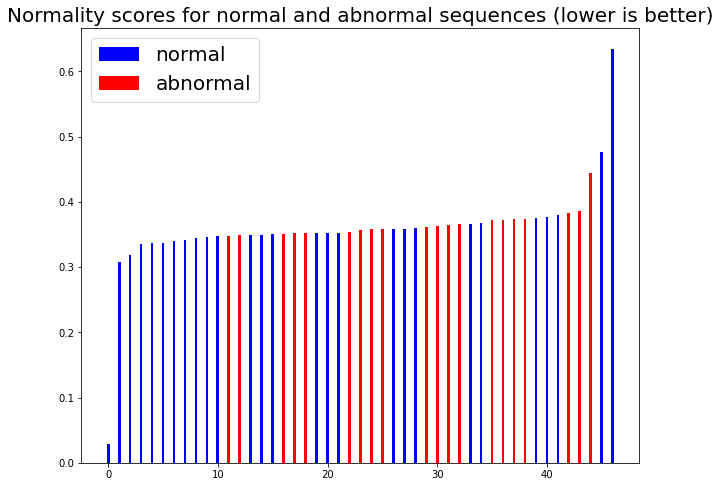

In [159]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [160]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 11


# Repeat with more clusters

In [161]:
# Computing the medoids

n_clusters = 10
M, C = kMedoids(D, n_clusters, init = "heuristic")

M, C

Terminated in 4 iterations


(array([ 14, 102,  69,  97,  59,  12,  55,  37,  90, 101], dtype=int64),
 {0: array([  0,   2,  14,  36,  39,  53,  54,  62,  65,  70,  88,  95,  99,
         100], dtype=int64),
  1: array([ 34,  44,  45, 102], dtype=int64),
  2: array([ 6,  9, 15, 25, 47, 60, 64, 68, 69, 79, 81, 87], dtype=int64),
  3: array([ 5, 24, 26, 27, 40, 43, 48, 49, 52, 78, 93, 97], dtype=int64),
  4: array([  4,  11,  16,  17,  19,  20,  21,  28,  31,  32,  38,  50,  51,
          57,  58,  59,  63,  67,  71,  73,  75,  76,  77,  82,  84,  85,
          86,  89,  92,  94,  98, 103], dtype=int64),
  5: array([12, 18, 30, 61, 80, 96], dtype=int64),
  6: array([ 8, 23, 55, 66], dtype=int64),
  7: array([ 3, 10, 22, 33, 37], dtype=int64),
  8: array([35, 46, 56, 90, 91], dtype=int64),
  9: array([  1,   7,  13,  29,  41,  42,  72,  74,  83, 101], dtype=int64)})

In [162]:
# Assigning the clusters
clusters_normal = np.argmin(D_normal[:, M], axis = 1)
clusters_abnormal = np.argmin(D_abnormal[:, M], axis = 1)

In [163]:
# Computing the scores (the smallest distance)
score_normal = np.min(D_normal[:, M], axis = 1)
score_abnormal = np.min(D_abnormal[:, M], axis = 1)

In [164]:
D_normal[0, M], score_normal[0]

(array([0.35027758, 0.36168773, 0.33233608, 0.37735402, 0.40942765,
        0.38093472, 0.38403657, 0.3615892 , 0.37079069, 0.34993924]),
 0.3323360752341048)

In [165]:
D_abnormal[0, M], score_abnormal[0]

(array([0.42054903, 0.37865727, 0.45155149, 0.45979269, 0.34842963,
        0.37519538, 0.37517782, 0.3841642 , 0.36952926, 0.45024051]),
 0.3484296300997055)

In [166]:
score_normal.shape, score_abnormal.shape

((27,), (20,))

In [167]:
# Computing all the scores:
labels = np.zeros(score_normal.shape[0]+ score_abnormal.shape[0])
labels[score_normal.shape[0]: ] = 1
scores = np.hstack((score_normal, score_abnormal))
scores = np.vstack((scores, labels)).T

In [168]:
scores

array([[0.33233608, 0.        ],
       [0.4760614 , 0.        ],
       [0.3170204 , 0.        ],
       [0.33938723, 0.        ],
       [0.36666763, 0.        ],
       [0.33694707, 0.        ],
       [0.02842942, 0.        ],
       [0.33498993, 0.        ],
       [0.34523223, 0.        ],
       [0.31775381, 0.        ],
       [0.3679271 , 0.        ],
       [0.34798879, 0.        ],
       [0.35178156, 0.        ],
       [0.3374695 , 0.        ],
       [0.33622909, 0.        ],
       [0.34786831, 0.        ],
       [0.34291492, 0.        ],
       [0.33570843, 0.        ],
       [0.30816911, 0.        ],
       [0.3297675 , 0.        ],
       [0.35914905, 0.        ],
       [0.37556227, 0.        ],
       [0.33432233, 0.        ],
       [0.37623302, 0.        ],
       [0.63469232, 0.        ],
       [0.33773922, 0.        ],
       [0.38013351, 0.        ],
       [0.34842963, 1.        ],
       [0.36021649, 1.        ],
       [0.35679982, 1.        ],
       [0.

In [169]:
scores_sorted = scores[scores[:, 0].argsort()]

In [170]:
scores[:, 0]

array([0.33233608, 0.4760614 , 0.3170204 , 0.33938723, 0.36666763,
       0.33694707, 0.02842942, 0.33498993, 0.34523223, 0.31775381,
       0.3679271 , 0.34798879, 0.35178156, 0.3374695 , 0.33622909,
       0.34786831, 0.34291492, 0.33570843, 0.30816911, 0.3297675 ,
       0.35914905, 0.37556227, 0.33432233, 0.37623302, 0.63469232,
       0.33773922, 0.38013351, 0.34842963, 0.36021649, 0.35679982,
       0.35155015, 0.3613599 , 0.35083065, 0.35355889, 0.35587827,
       0.44365426, 0.36432035, 0.35839278, 0.38283833, 0.37150852,
       0.36571709, 0.34678613, 0.36177647, 0.35306991, 0.34812551,
       0.3468801 , 0.3856219 ])

In [171]:
scores_sorted

array([[0.02842942, 0.        ],
       [0.30816911, 0.        ],
       [0.3170204 , 0.        ],
       [0.31775381, 0.        ],
       [0.3297675 , 0.        ],
       [0.33233608, 0.        ],
       [0.33432233, 0.        ],
       [0.33498993, 0.        ],
       [0.33570843, 0.        ],
       [0.33622909, 0.        ],
       [0.33694707, 0.        ],
       [0.3374695 , 0.        ],
       [0.33773922, 0.        ],
       [0.33938723, 0.        ],
       [0.34291492, 0.        ],
       [0.34523223, 0.        ],
       [0.34678613, 1.        ],
       [0.3468801 , 1.        ],
       [0.34786831, 0.        ],
       [0.34798879, 0.        ],
       [0.34812551, 1.        ],
       [0.34842963, 1.        ],
       [0.35083065, 1.        ],
       [0.35155015, 1.        ],
       [0.35178156, 0.        ],
       [0.35306991, 1.        ],
       [0.35355889, 1.        ],
       [0.35587827, 1.        ],
       [0.35679982, 1.        ],
       [0.35839278, 1.        ],
       [0.

## Plotting the scores

In [172]:
scores[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

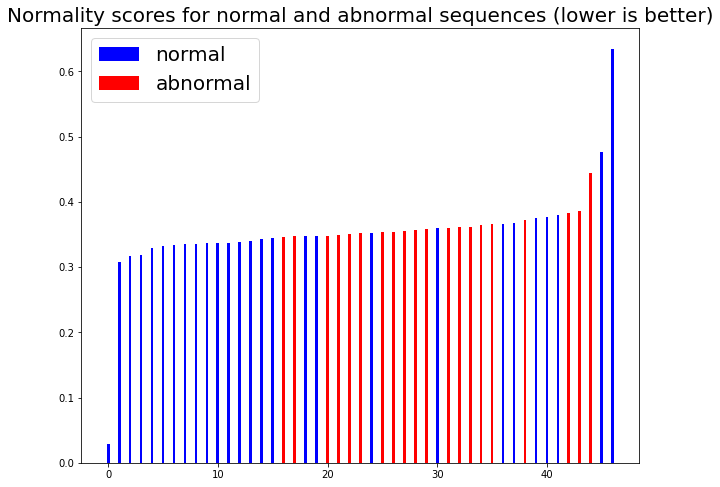

In [173]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [174]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 12


# K-NN

In [175]:
#compute the score given by the distance to the kth nearest neighbor

score_normal_nn = distance_k_neighbor(D_normal, 1)
score_abnormal_nn = distance_k_neighbor(D_abnormal, 1)

In [176]:
score_normal_nn

array([0.33034528, 0.38437002, 0.31656203, 0.34232001, 0.3457914 ,
       0.33694707, 0.07863557, 0.33498993, 0.34023374, 0.31004312,
       0.34752172, 0.33141469, 0.34267499, 0.29396762, 0.33789372,
       0.34786831, 0.34140595, 0.33504021, 0.30311092, 0.31901842,
       0.34994853, 0.28678651, 0.26625303, 0.30762206, 0.46506188,
       0.33773922, 0.30983618])

In [177]:
# Computing all the scores:
labels = np.zeros(score_normal_nn.shape[0]+ score_abnormal_nn.shape[0])
labels[score_normal_nn.shape[0]: ] = 1
scores = np.hstack((score_normal_nn, score_abnormal_nn))
scores = np.vstack((scores, labels)).T

In [178]:
scores_sorted = scores[scores[:, 0].argsort()]

In [179]:
scores_sorted

array([[0.07863557, 0.        ],
       [0.26625303, 0.        ],
       [0.28678651, 0.        ],
       [0.29396762, 0.        ],
       [0.30311092, 0.        ],
       [0.30762206, 0.        ],
       [0.30983618, 0.        ],
       [0.31004312, 0.        ],
       [0.31656203, 0.        ],
       [0.31901842, 0.        ],
       [0.33034528, 0.        ],
       [0.33141469, 0.        ],
       [0.33475639, 1.        ],
       [0.33498993, 0.        ],
       [0.33504021, 0.        ],
       [0.33694707, 0.        ],
       [0.33773922, 0.        ],
       [0.33789372, 0.        ],
       [0.33869674, 1.        ],
       [0.34023374, 0.        ],
       [0.34140595, 0.        ],
       [0.3415542 , 1.        ],
       [0.34160148, 1.        ],
       [0.34232001, 0.        ],
       [0.34267499, 0.        ],
       [0.34426957, 1.        ],
       [0.34513206, 1.        ],
       [0.34554096, 1.        ],
       [0.3457914 , 0.        ],
       [0.34591726, 1.        ],
       [0.

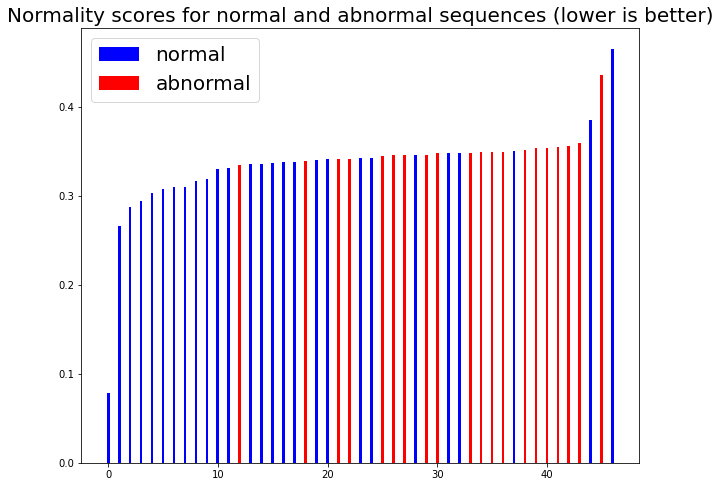

In [180]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [182]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 14


In [183]:
#compute the score given by the distance to the kth nearest neighbor

score_normal_nn = distance_k_neighbor(D_normal, 5)
score_abnormal_nn = distance_k_neighbor(D_abnormal, 5)

In [184]:
score_normal_nn

array([0.33423819, 0.40017873, 0.33888047, 0.34781327, 0.35660202,
       0.34680483, 0.31502055, 0.33930505, 0.34462568, 0.31761558,
       0.35224658, 0.33774345, 0.34573882, 0.33404427, 0.34102574,
       0.35092659, 0.3454465 , 0.33857267, 0.31270185, 0.34499833,
       0.35534244, 0.35630935, 0.32591999, 0.35418117, 0.51719507,
       0.34247158, 0.33635662])

In [185]:
# Computing all the scores:
labels = np.zeros(score_normal_nn.shape[0]+ score_abnormal_nn.shape[0])
labels[score_normal_nn.shape[0]: ] = 1
scores = np.hstack((score_normal_nn, score_abnormal_nn))
scores = np.vstack((scores, labels)).T

In [186]:
scores_sorted = scores[scores[:, 0].argsort()]

In [187]:
scores_sorted

array([[0.31270185, 0.        ],
       [0.31502055, 0.        ],
       [0.31761558, 0.        ],
       [0.32591999, 0.        ],
       [0.33404427, 0.        ],
       [0.33423819, 0.        ],
       [0.33635662, 0.        ],
       [0.33774345, 0.        ],
       [0.33857267, 0.        ],
       [0.33888047, 0.        ],
       [0.33930505, 0.        ],
       [0.34102574, 0.        ],
       [0.34185638, 1.        ],
       [0.34247158, 0.        ],
       [0.34462568, 0.        ],
       [0.34499833, 0.        ],
       [0.3454465 , 0.        ],
       [0.34573882, 0.        ],
       [0.34592844, 1.        ],
       [0.34680483, 0.        ],
       [0.34715887, 1.        ],
       [0.34781327, 0.        ],
       [0.34782583, 1.        ],
       [0.34842963, 1.        ],
       [0.35065197, 1.        ],
       [0.35092659, 0.        ],
       [0.35122525, 1.        ],
       [0.35155015, 1.        ],
       [0.35224658, 0.        ],
       [0.35355934, 1.        ],
       [0.

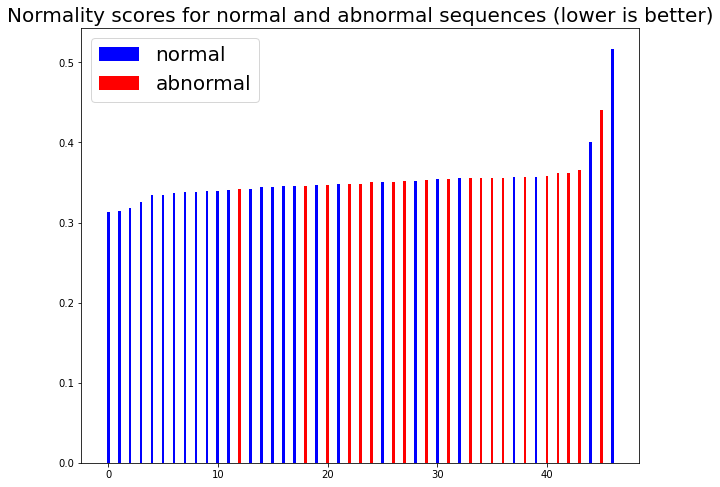

In [188]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [189]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 13


# Conclusion

The k-medoids does not perfrom very well. The simplest nearest neighbor has the best performance.

# Markov chain 

In [190]:
from markov_chain import compute_markov_chain, compute_probability

In [191]:
import markov_chain
markov_chain = reload(markov_chain)
from markov_chain import compute_markov_chain, compute_probability

In [21]:
from itertools import combinations_with_replacement

In [193]:
train.shape, test_normal.shape, test_abnormal.shape

((104,), (27,), (20,))

In [194]:
A = np.array(['C', 'G', 'T', 'A', 'N'])

In [24]:
comb = list(combinations_with_replacement('ACGTN', 4))
A = []

for element in comb:
    A.append(''.join(element))
print(len(A))

A = np.array(A)

70


In [25]:
A

array(['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AAAN', 'AACC', 'AACG', 'AACT',
       'AACN', 'AAGG', 'AAGT', 'AAGN', 'AATT', 'AATN', 'AANN', 'ACCC',
       'ACCG', 'ACCT', 'ACCN', 'ACGG', 'ACGT', 'ACGN', 'ACTT', 'ACTN',
       'ACNN', 'AGGG', 'AGGT', 'AGGN', 'AGTT', 'AGTN', 'AGNN', 'ATTT',
       'ATTN', 'ATNN', 'ANNN', 'CCCC', 'CCCG', 'CCCT', 'CCCN', 'CCGG',
       'CCGT', 'CCGN', 'CCTT', 'CCTN', 'CCNN', 'CGGG', 'CGGT', 'CGGN',
       'CGTT', 'CGTN', 'CGNN', 'CTTT', 'CTTN', 'CTNN', 'CNNN', 'GGGG',
       'GGGT', 'GGGN', 'GGTT', 'GGTN', 'GGNN', 'GTTT', 'GTTN', 'GTNN',
       'GNNN', 'TTTT', 'TTTN', 'TTNN', 'TNNN', 'NNNN'], dtype='<U4')

In [323]:
Q, P = compute_markov_chain(A, human_train)

483069


In [326]:
# Note that the transition probabilities do not add up to 1 
np.sum(Q), np.sum(P, axis = 0)

(0.04509293703383988,
 array([0.04518664, 0.04173623, 0.07403055, 0.02225755, 1.        ,
        0.06768559, 0.06349206, 0.02544031, 1.        , 0.05748865,
        0.04347826, 1.        , 0.02702703, 1.        , 1.        ,
        0.03211009, 0.03414634, 0.01902748, 1.        , 0.00487805,
        0.02409639, 1.        , 0.04157549, 1.        , 1.        ,
        0.0695825 , 0.02428256, 1.        , 0.02857143, 1.        ,
        1.        , 0.03333333, 1.        , 1.        , 1.        ,
        0.03001876, 0.03481013, 0.03231018, 1.        , 0.11428571,
        0.11594203, 1.        , 0.01965602, 1.        , 1.        ,
        0.08278146, 0.02139037, 1.        , 0.032     , 1.        ,
        1.        , 0.02217295, 1.        , 1.        , 1.        ,
        0.05727924, 0.03550296, 1.        , 0.04518072, 1.        ,
        1.        , 0.02684564, 1.        , 1.        , 1.        ,
        0.03094778, 1.        , 1.        , 1.        , 1.        ,
        0.05970149, 0.0323

In [286]:
for i in range(human_train.shape[0]):
    if len(''.join(set(human_train[i]))) != 4:
        print(''.join(set(human_train[i])))
        print(i, human_train[i])

NGTCA
10 NNAGGATACCATTGTCTTCCTGCCCCAAACCGTGCCCAGGGAGAGGTGGGAGGTGATGGGGGATCTGTGCAGTTTGGGGGCTCAGTCAAGACGAGCTCTGCGTTACGGGAGGAACAGGAAGCCCAGTGGGAAAATTGGCCTAAGTCTGGGGTTCTGACGACAGCCCCTGGCTTCTTTCTTGGCAGATAA
NGCTA
15 NGCCGAGTGCCAAAGTACATCTTCCGCCACAATGATGTCAGCCACCTCAGAGAACTGCTGCAAAGATCTGACCCCTCAGTCCCCAAGATTGTGGCATTTGAAACTGTCCATTCAATGGATGGCAAAGCCTTTGGTTGTGTTGGAGGGTACATCGCCAGCACGAGTTCTCTGATTGACACCGTACGGTCCTATGCTGCTGGCTTCATCTTCACCACCTCTCTGCCACCCATGCTGCTGGCTGGAGCCCTGGAGTCTGTGCGGATCCTGAAGAGCGCTGAGGGACGGGTGCTTCGCCGCCAGCACCAGCGCAACGTCAAACTCATGAGACAGATGCTAATGGATGCCGGCCTCCCTGTTGTCCACTGCCCCAGCCACATCATCCCTGTGCGGGTTGCAGATGCTGCTAAAAACACAGAAGTCTGTGATGAACTAATGAGCAGACATAACATCTACGTGCAAGCAATCAATTACCCTACGGTGCCCCGGGGAGAAGAGCTCCTACGGATTGCCCCCACCCCTCACCACACACCCCAGATGATGAACTACTTCCTTGAGAATCTGCTAGTCACATGGAAGCAAGTGGGGCTGGAACTGAAGCCTCATTCCTCAGCTGAGTGCAACTTCTGCAGGAGGCCACTGCATTTTGAAGTGATGAGTGAAAGAGAGAAGTCCTATTTCTCAGGCTTGAGCAAGTTGGTATCTGCTCAGGCCTGA
NGTCA
16 NNTGTCCGGCTGCACAATGCTATTGAAGGGGGGACCCAGCTTTCTAGGGCCCTAGAAACTCTGACAGG

In [295]:
human_train[323]

'NTGGCCCAGGGGAATCCCCAGCAAGGGTTCTTCTCCAGCTTCTTCACCAGCAACCAGAAGTGCCAGCTTAGGCTCCTGAAGACGCTGGAGACAAATAGTTTTGTGCCAGAATAA'

In [294]:
P

array([[0.23077296, 0.26889596, 0.2444083 , 0.21587162, 0.12658228],
       [0.13817423, 0.23475499, 0.38055724, 0.30497037, 0.30379747],
       [0.28036816, 0.1757136 , 0.18743453, 0.21385397, 0.12658228],
       [0.29078542, 0.26723644, 0.13935601, 0.20734323, 0.15189873],
       [0.        , 0.        , 0.        , 0.        , 0.29113924]])

In [328]:
human_train.shape, A.shape

((568,), (126,))

In [336]:
prob_human = compute_probability(human_test, A, Q, P)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

ValueError: setting an array element with a sequence.

In [297]:
prob_dog = compute_probability(dog_test, A, Q, P)

In [298]:
prob_human

array([0.00000000e+000, 0.00000000e+000, 5.41863439e-092, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.10399081e-318,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.18937633e-198,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 2.80584075e-096, 0.00000000e+000,
       0.00000000e+000, 1.13168901e-057, 0.00000000e+000, 4.22766315e-258,
       3.56086958e-239, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 8.71879517e-249, 0.00000000e+000, 8.68201780e-183,
       3.01326598e-261, 0.00000000e+000, 1.28803309e-203, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.87344460e-279, 3.56327012e-174,
       7.73145029e-182, 0.00000000e+000, 8.82714962e-254, 2.32295346e-095,
       3.82583909e-235, 0.00000000e+000, 2.75826170e-258, 3.99275216e-172,
       0.00000000e+000, 1.56609233e-135, 5.78590288e-076, 3.66397540e-176,
       0.00000000e+000, 0

In [299]:
prob_dog

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.77796495e-197, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])